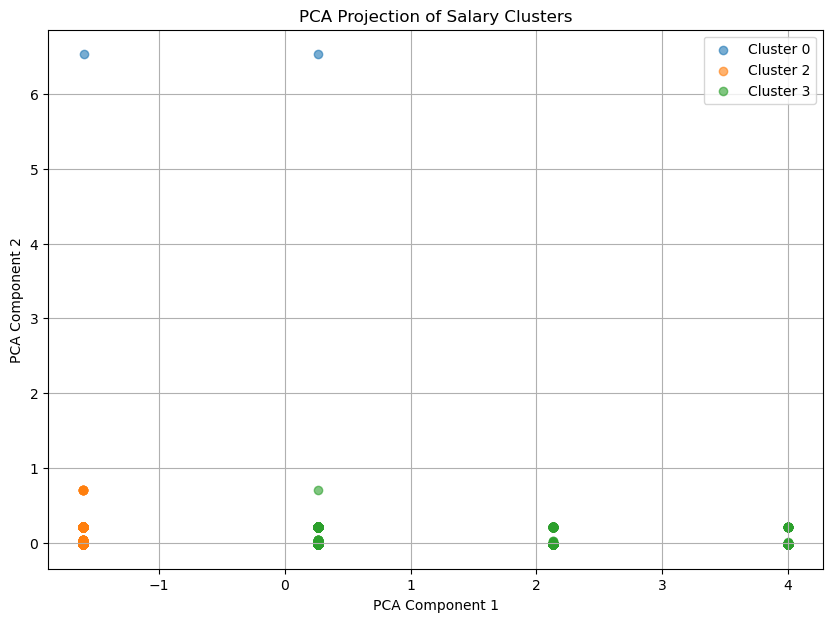


Sample combinations per cluster:
      Gender Country_cleaned Industry_grouped      JobTitle_grouped  Cluster
0      Woman   United States        Education  Education & Training        3
5        Man   United States        Education  Education & Training        2
11426  Woman       Indonesia        Education            Management        0


In [2]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("CleanedDataset.csv")
features = df[['Gender', 'Country_cleaned', 'Industry_grouped', 'JobTitle_grouped']].copy()

# Load encoders and model
model = joblib.load("ridge_model.pkl")
scaler = joblib.load("scaler.pkl")
enc_country = joblib.load("target_encoder_Country_cleaned.pkl")
enc_industry = joblib.load("target_encoder_Industry_grouped.pkl")
enc_job = joblib.load("target_encoder_JobTitle_grouped.pkl")
gender_map = joblib.load("gender_mapping.pkl")

# Apply encoders
features['Gender'] = features['Gender'].map(gender_map).fillna(2)
features['Country_cleaned'] = enc_country.transform(features['Country_cleaned'])
features['Industry_grouped'] = enc_industry.transform(features['Industry_grouped'])
features['JobTitle_grouped'] = enc_job.transform(features['JobTitle_grouped'])

# Scale and predict
# Reorder columns to match training
features = features[scaler.feature_names_in_]

# Scale and predict
X_scaled = scaler.transform(features)

df['Cluster'] = model.predict(X_scaled)

# Visualize with PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 7))
for cluster in sorted(df['Cluster'].unique()):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f"Cluster {cluster}", alpha=0.6)
plt.legend()
plt.title("PCA Projection of Salary Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Print one sample row per cluster
sample_rows = df.groupby('Cluster').head(1)[['Gender', 'Country_cleaned', 'Industry_grouped', 'JobTitle_grouped', 'Cluster']]
print("\nSample combinations per cluster:")
print(sample_rows)
